In [242]:
from scipy.stats import f


def F_test(data1, data2, alpha=0.05):
    var1 = data1.var(ddof=1)
    var2 = data2.var(ddof=1)
    n, m = len(data1), len(data2)
    
    statistic = var1 / var2
    p_value = 2 * min(f.sf(statistic, n-1, m-1), f.cdf(statistic, n-1, m-1))
    
    result = 0 if p_value < alpha else 1
    
    return {'statistic': statistic, 'p_value': p_value, 'result':result}

Проверим работоспособность теста. При верной нулевой гипотезе распределение p value - равномерное

Частота отвержения нулевой гипотезы - 0.05900000000000005


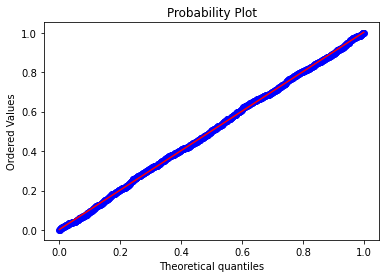

In [247]:
import pylab 
import scipy.stats as stats

p_values = []
count = 0
for i in range(int(1e3)):
    data1 = np.random.randn(100)
    data2 = np.random.randn(100)
    test = F_test(data1, data2, alpha=0.05)
    
    count += test['result']
    
    p_values.append(test['p_value'])
    
print(f"Частота отвержения нулевой гипотезы - {1-count/int(1e3)}")
stats.probplot(p_values, dist="uniform", plot=pylab)
pylab.show()

Видим, что критерий работает. Тогда проверим его на нашей задаче при p = 0.4 и p=0.9

Частота отвержения нулевой гипотезы - 0.025000000000000022
Заданная корреляция 0.4
Выборочная корреляция в выборках на последней итерации - 0.39922796330033483


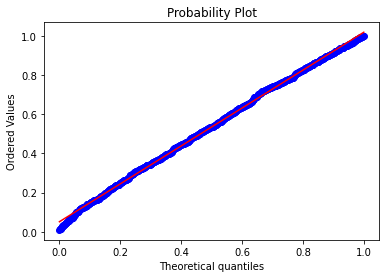

In [249]:
p = 0.4

# https://math.stackexchange.com/questions/163470/generating-correlated-random-numbers-why-does-cholesky-decomposition-work
L = np.array([[1, 0], [p, np.sqrt(1 - p**2)]])

p_values, count = [], 0
for i in range(int(1e3)):
    # создаем корелированную выборки: cor(x_i, y_i) = p
    sample = multivariate_normal(cov=L@L.T).rvs(size=100)
    
    test = F_test(sample[:, 0], sample[:, 1])
    count += test['result']
    
    p_values.append(test['p_value'])
        
        
print(f"Частота отвержения нулевой гипотезы - {1-count/int(1e3)}")
print(f'Заданная корреляция {p}')
cor = pearsonr(sample[:, 0], sample[:, 1])
print(f"Выборочная корреляция в выборках на последней итерации - {cor[0]}")

stats.probplot(p_values, dist="uniform", plot=pylab)
pylab.show()

Частота отвержения нулевой гипотезы - 0.0
Заданная корреляция 0.9
Выборочная корреляция в выборках на последней итерации - 0.8944672492866469


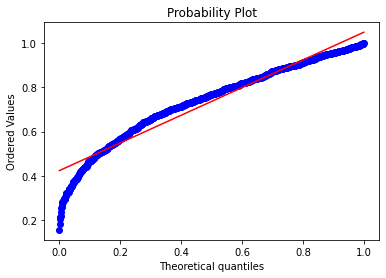

In [250]:
p = 0.9
L = np.array([[1, 0], [p, np.sqrt(1 - p**2)]])

p_values, count = [], 0
for i in range(int(1e3)):
    # создаем корелированную выборки: cor(x_i, y_i) = p
    sample = multivariate_normal(cov=L@L.T).rvs(size=100)
    
    test = F_test(sample[:, 0], sample[:, 1])
    count += test['result']
    
    p_values.append(test['p_value'])
        
        
print(f"Частота отвержения нулевой гипотезы - {1-count/int(1e3)}")
print(f'Заданная корреляция {p}')
cor = pearsonr(sample[:, 0], sample[:, 1])
print(f"Выборочная корреляция в выборках на последней итерации - {cor[0]}")

stats.probplot(p_values, dist="uniform", plot=pylab)
pylab.show()

Видим, что ничего не работает. Так как выборки должны быть независимые, а у нас корреляция не 0